In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
df_= df.iloc[:,1:]
df_

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [4]:
df_.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [5]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [6]:
df_ = df_.drop(columns=["Purchase Address", "Month", "Hour"])

In [7]:
# Convert 'Order Date' to a SQL-compatible format (YYYY-MM-DD)
df_['Order Date'] = pd.to_datetime(df_['Order Date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Rename columns to match the SQL table
df_.rename(columns={
    'Order ID': 'OrderID',
    'Quantity Ordered': 'Quantity',
    'Price Each': 'Price',
    'Sales': 'TotalRevenue '
}, inplace=True)

# Save the cleaned data back to a new CSV
cleaned_file_path = r'C:\Users\marya\OneDrive - Høyskolen Kristiania\Revision Plan\SQL\Data Collection & Planning\Sales_Data_Cleaned_.csv'
df_.to_csv(cleaned_file_path,index=False, encoding='utf-8')

In [8]:
df_.head()

,OrderID,Product,Quantity,Price,Order Date,TotalRevenue,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18,11.95,Atlanta


In [9]:
df_.describe()

,OrderID,Quantity,Price,TotalRevenue
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,185.490917
std,51512.737110,0.442793,332.731330,332.919771
min,141234.000000,1.000000,2.990000,2.990000
25%,185831.250000,1.000000,11.950000,11.950000
50%,230367.500000,1.000000,14.950000,14.950000
75%,275035.750000,1.000000,150.000000,150.000000
max,319670.000000,9.000000,1700.000000,3400.000000


In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        185950 non-null  int64  
 1   Product        185950 non-null  object 
 2   Quantity       185950 non-null  int64  
 3   Price          185950 non-null  float64
 4   Order Date     185950 non-null  object 
 5   TotalRevenue   185950 non-null  float64
 6   City           185950 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 9.9+ MB


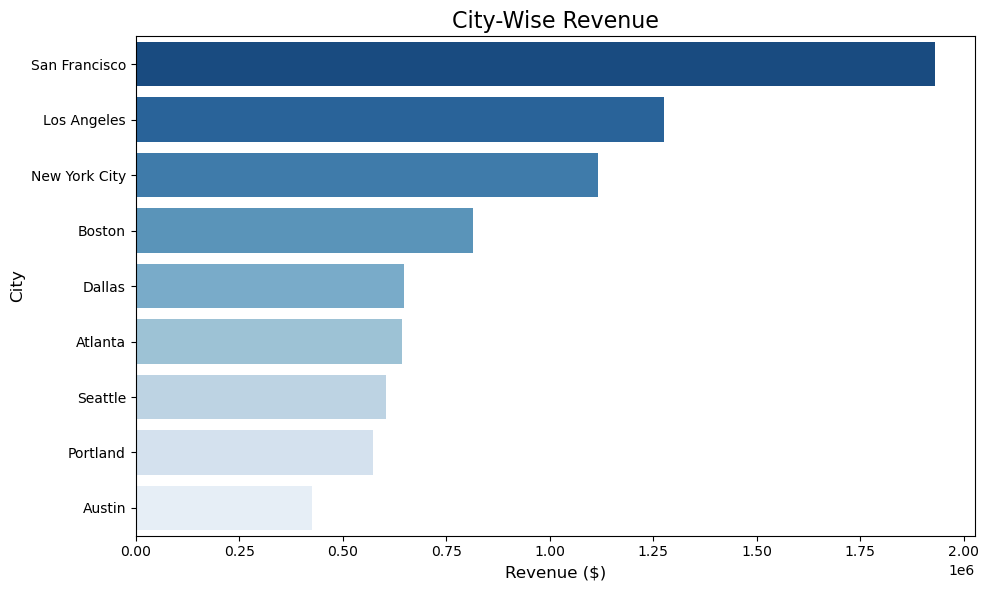

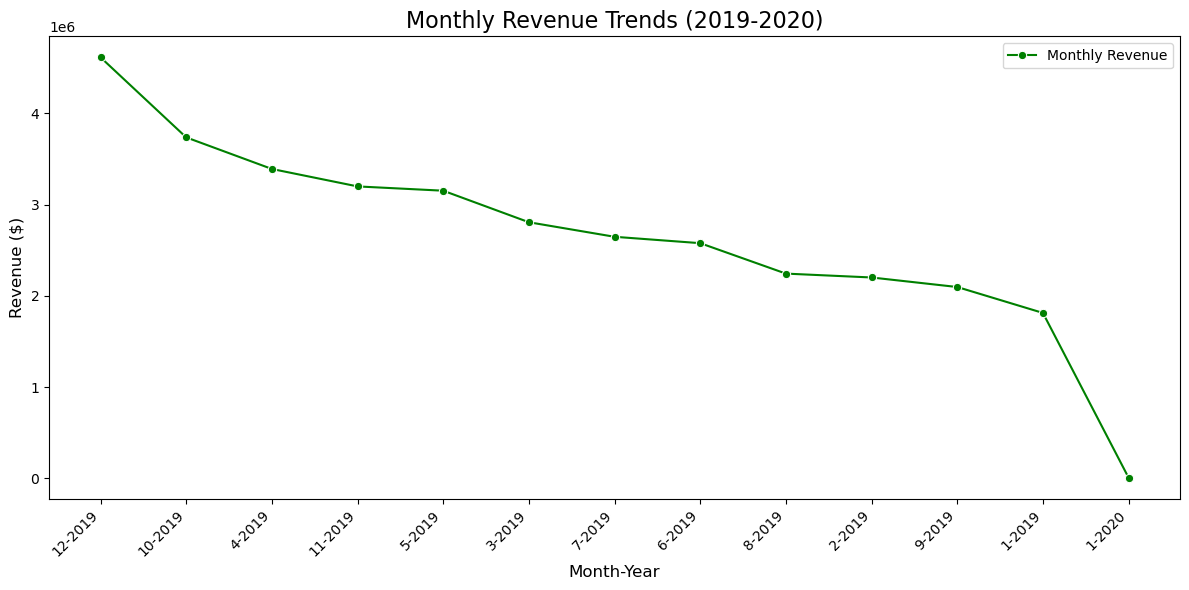

In [14]:
#USING DATAFRAME
# Data for city-wise revenue
city_revenue_data = {
    "City": ["San Francisco", "Los Angeles", "New York City", "Boston", "Dallas", 
             "Atlanta", "Seattle", "Portland", "Austin"],
    "Revenue": [1931200.00, 1276700.00, 1116900.00, 814300.00, 649400.00, 
                644300.00, 605200.00, 572900.00, 426700.00]
}

# Data for monthly revenue
monthly_revenue_data = {
    "Month": [4, 10, 7, 2, 8, 5, 11, 1, 6, 3, 12, 1, 9],
    "Year": [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2019, 2019, 2019, 2019, 2019],
    "Revenue": [3390670.24, 3736726.88, 2647775.76, 2202022.42, 2244467.88, 3152606.75, 
                3199603.20, 8670.29, 2577802.26, 2807100.38, 4613443.34, 1813586.44, 2097560.13]
}

# Convert data to Pandas DataFrames
city_revenue_df = pd.DataFrame(city_revenue_data)
monthly_revenue_df = pd.DataFrame(monthly_revenue_data)

# Sort the monthly data by revenue for better visuals
monthly_revenue_df["Month-Year"] = monthly_revenue_df["Month"].astype(str) + "-" + monthly_revenue_df["Year"].astype(str)
monthly_revenue_df.sort_values(by="Revenue", ascending=False, inplace=True)

# Visualization 1: City-Wise Revenue Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=city_revenue_df, x="Revenue", y="City", palette="Blues_r")
plt.title("City-Wise Revenue", fontsize=16)
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 2: Monthly Revenue Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue_df, x="Month-Year", y="Revenue", marker="o", color="green", label="Monthly Revenue")
plt.xticks(rotation=45, ha="right")
plt.title("Monthly Revenue Trends (2019-2020)", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
